In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import random as rd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


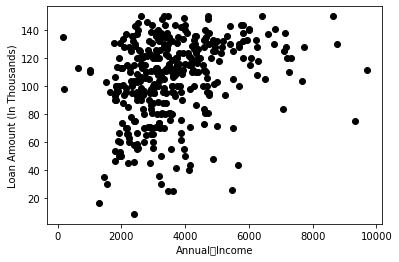

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Annual　Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)

     LoanAmount  ApplicantIncome
140       138.0             4735
268       100.0             1820


In [5]:
print(Centroids)

     LoanAmount  ApplicantIncome
140       138.0             4735
268       100.0             1820


In [6]:
print(X)

     LoanAmount  ApplicantIncome
0         128.0             4583
1          66.0             3000
2         120.0             2583
3         141.0             6000
4          95.0             2333
..          ...              ...
376       128.0             5703
377       108.0             3232
378        71.0             2900
379        40.0             4106
380       133.0             4583

[381 rows x 2 columns]


In [7]:
diff = 1
j=0

# Step 5 - Repeat step 3 and 4
while(diff!=0):
    XD=X
    i=1
    # Step 3 - Assign all the points to the closest cluster centroid
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    
    # Step 4 - Recompute centroids of newly formed clusters
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
print(X)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


399.9346321149042
266.1812060785653
252.40036582348702
152.85552248820204
31.55103483486087
0.0
     LoanAmount  ApplicantIncome            1            2  Cluster
0         128.0             4583   738.699668  1719.417865        1
1          66.0             3000  2322.103012   140.594719        2
2         120.0             2583  2738.590117   281.447662        2
3         141.0             6000   678.911762  3136.460529        1
4          95.0             2333  2988.652627   530.828675        2
..          ...              ...          ...          ...      ...
376       128.0             5703   381.635281  2839.333388        1
377       108.0             3232  2089.597371   368.272867        2
378        71.0             2900  2421.985618    46.930850        2
379        40.0             4106  1217.898197  1243.693830        1
380       133.0             4583   738.804452  1719.504046        1

[381 rows x 5 columns]


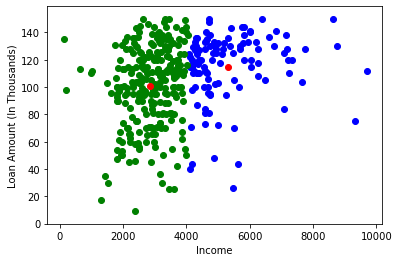

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()